In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,FloatSlider

Falls `ipywidgets` nicht vorhanden ist, kommentiert nur die Zeile aus, die dies enthält. Es sollte dann alles bis auf eine einzelne Zelle funktionieren.

# Brachystochrone

Auf dem Blatt ist eine Parametrisierung einer Zykloiden angegeben mit

$$
\begin{pmatrix}x(t)\\ y(t)\end{pmatrix}=R\begin{pmatrix}\varphi(t)-\sin(\varphi(t))\\ 1-\cos(\varphi(t))\end{pmatrix} \, .
$$

Wir benötigen also eine Funktion, die uns abhängig von $\varphi$, die Koordinaten $x,y$ gibt.

In [7]:
def cycloid(Rad,phi):
    # Variablennamen mit _ werden gerne gewählt, um Variablen zu kennzeichnen,
    #     die nur in der Entsprechenden Funktion/Klasse leben
    # AUFGABE: füge die oben angegebene Parametrisiertung der Zykloiden ein
    x = Rad * (phi - np.sin(phi))
    y = Rad * (1 - np.cos(phi))
    return x,y

# Was ist eigentlich eine Zykloide?

Eine Zykloide entsteht durch das Abrollen eines Kreises. Dies zu Beweisen ist nicht trivial, aber wir können uns zumindest graphisch davon überzeugen.

Vergleichen wir die Parametrisierung von oben mit dem Abrollen eines Kreises mit Radius R:

In [8]:
R = 1

def plot_func(phi):
    fig, ax = plt.subplots(figsize = (10,10))
    
    # Verhältnis der Seiten gleich, somit 
    ax.set_aspect('equal')
    
    # Zykloide abgerollt bis zum Winkel phi
    winkel = np.linspace(0,phi*np.pi,int(100*phi//2+2))
    x,y = cycloid(R,winkel)
    ax.plot(x,y)

    # Plotten des abrollenden Kreises
    ax.plot([-R,R*2*np.pi+R],[0,0],c = 'black')
    circle_angle = phi
    circle = plt.Circle((circle_angle*R*np.pi, R), R, color='r',fill=False)
    ax.add_artist(circle)

    ax.set_ylim(2*R+0.1,-0.1)
    ax.set_xlim(-R,R*2*np.pi+R)
    ax.scatter(*cycloid(R,circle_angle*np.pi),c = 'black')

In [9]:
# Ein bisschen langsam aber es erfüllt die Aufgabe!
# Blau ist immer eine Zykloide, wie oben parametrisiert
# Wenn oben bei der Zykloiden alles funktioniert hat, sollte hier ein Plot entstehen

interact(plot_func, 
         phi = FloatSlider(value=0,min=0,max=2,step=0.1)
        )
plt.show()

interactive(children=(FloatSlider(value=0.0, description='phi', max=2.0), Output()), _dom_classes=('widget-int…

# Finde den schnellsten Weg 

Das Problem besteht nun also darin, den Radius des Kreises $R$, sowie den Winkel, bis zu dem abgerollt wird, zu finden.

Für die Anfangsbedingungen 
\begin{align}
A &= (0,0)\\
B &= (x_B,y_B)\, ,
\end{align}

finden wir

\begin{align}
x_B &=R(\varphi_B-\sin\varphi_B)\tag{1}\\
y_B &=R(1-\cos\varphi_B)\tag{2}
\end{align}

Division liefert:

$$
\frac{x_B}{y_B} = \frac{\varphi_B-\sin\varphi_B}{1-\cos\varphi_B}\\
\implies0 = \frac{y_B}{x_B} - \frac{1-\cos\varphi}{\varphi-\sin\varphi}
$$

Die Division kann natürlich auch genau andersherum durchgeführt werden, aber diese Version ist numerisch stabiler!


Es gilt also Nullstellen der Funktion
$$
f(\varphi) = \frac{y_B}{x_B} - \frac{1-\cos\varphi}{\varphi-\sin\varphi}
$$

zu finden. Dies soll mithilfe des [Newton–Raphson Verfahren](https://en.wikipedia.org/wiki/Newton%27s_method)
 geschehen. Dabei wird ausgehend von einem Startwert $\varphi_0$ iterativ vorgegangen
 
 $$
 \varphi_{n+1} = \varphi_n - \frac{f(\varphi_n)}{f'(\varphi_n)}\, ,
 $$
 
 bis ein ausreichend kleiner Wert gefunden wird. Wir benötigen also zunächst $f$ und $f'$ als Funktion:

In [10]:
def f_brach(phi,xb,yb):
    frac_1 = yb/xb
    frac_2 = (1-np.cos(phi)) / (phi-np.sin(phi))
    return frac_1 - frac_2

def df_brach(phi):
    # Falls ich micht nicht verrechnet habe - üperprüft das mal selber :)
    nenner = np.sin(phi)**2-phi*np.sin(phi)+np.cos(phi)**2-2*np.cos(phi)+1
    zahler = (phi-np.sin(phi))**2
    return nenner/zahler + 1

In [11]:
# AUFGABE: Parameter xb,yb einsetzen, beide sollten positve Werte sein
xb = 5
yb = 7

In [12]:
# Newton-Raphson
#     Sinvoller Anfangswert: 0 sieht problematisch aus
#     Also fangen wir mit phi_B = 1 an

phi_B = 1
root = f_brach(phi_B,xb,yb)
it = 0
maxit = 1000

while (abs(root) > 1e-10) and (it < maxit):
    phi_B -= f_brach(phi_B,xb,yb) / df_brach(phi_B)
    root = f_brach(phi_B,xb,yb)
    it+=1

In [13]:
# Kurz Überprüfen ob die Werte Sinn machen!
print('phi_B    :', phi_B)
print('f(phi_B) :', root)
print('iterationen:', it)

phi_B    : 1.8867203277298736
f(phi_B) : -7.749201280660145e-11
iterationen: 35


Mit $\varphi$ festgelegt, gilt es nun noch $R$ zu bestimmen. Aus Gleichung (1) ergibt sich

$$
R = \frac{y_B}{1-\cos\varphi_B}
$$

In [15]:
# AUFGABE: R berechnen

R = yb / (1 - np.cos(phi_B))
print("R   = {:.2f}".format(R))
print("Phi = {:.2f} Rad".format(phi_B))

R   = 5.34
Phi = 1.89 Rad


# Plot und Vergleich

Zum Verleich fügen wir noch einige Kurven hinzu, die alle parametrisiert sind durch:
\begin{align}
\gamma: [0,1] &\mapsto \mathbb{R}^2 \\
\gamma(0) &\rightarrow (0,0)\\
\gamma(1) &\rightarrow (x_B,y_B)
\end{align}

In [16]:
def line(t,xb,yb):
    # Kürzeste Verbindung der beiden Punkte
    x = xb * t
    y = yb * t
    return x,y

def parabula(t,xb,yb):
    # Parabel mit Minimum bei (x_B,y_B)
    a = -yb/xb**2
    b = -2*a*xb
    c = 0
    x = t*xb
    y = a*(t*xb)**2+b*(t*xb)+c
    return x,y

def circle(t,xb,yb):
    # Kreisausschnitt vom Kreis durch die Punkte (0,0), (xB,yB), (xB,-yB)
    #     Soweit ich weiß war das Galileo's best guess
    r = (xb**2+yb**2) / (2*xb)
    x = t * xb
    y = np.sqrt(r**2 - (x-r)**2)
    return x,y
    
def brachistochrone(t,xb,yb):
    # Die gleiche Lösung wie oben, der Vollständigkeit halber noch 
    #     einmal parametrisiert wie die restlichen Kurven
    x,y = cycloid(R,phi_B * t)
    return x,y

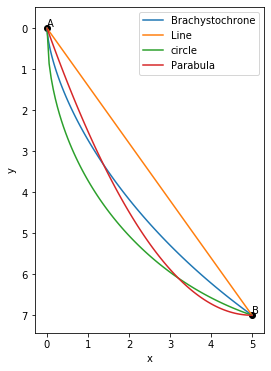

In [24]:
fig, ax = plt.subplots(figsize = (6,6))

# Kurven zum Vergleich
times = np.linspace(0,1,100)

# Aufgabe: Für die Kurven oben einen Plot hinzufügen
#          Füge auch ein label hinzu
ax.plot(*brachistochrone(times,xb,yb),label="Brachystochrone")
ax.plot(*line(times,xb,yb), label = "Line")
ax.plot(*circle(times,xb,yb), label = "circle")
ax.plot(*parabula(times,xb,yb), label = "Parabula")

# Plot Start- und Endpunkt
ax.scatter(0, 0, c = 'black')
ax.annotate("A", (0, 0-0.05))
ax.scatter(xb,yb,c = 'black')
ax.annotate("B", (xb,yb-0.05))

# Limits setzen
ax.set_aspect('equal')

# Richtung der y-Achse umdrehen
lims = ax.get_ylim()
ax.set_ylim(lims[1],lims[0] - 0.1)

# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()


plt.show()

# Laufzeiten Bestimmen

Die gesamte Laufzeit erhält man durch Integration von $1/v$ ($v$: Geschwindigkeit, die von der Position auf der Kurve abhängt) über den zurückgelegten Weg. Wir bestimmen die Wegintegrale

$$
T = \int_\gamma f\, \text{d}s = \int_0^1 f(\gamma(t))\,\|\dot{\gamma}(t)\|_2\,\text{d}t\, ,
$$

wobei $f$ hier $1/v$ entspricht. Die Geschwindigkeit ist durch die Energieerhaltung direkt durch die $y$-Komponente via $v = \sqrt{2gy}$ bestimmt. Es werden also nur noch die Ableitungen der entsprechenden Kurven benötigt.

In [25]:
def d_line(t,xb,yb):
    # Am einfachsten zu bestimmen
    # Konstant, deswegen erstellen wir den neue-Zeiten array mit lauter Einsen
    tt = np.ones_like(t)
    dx = xb 
    dy = yb * tt
    return np.sqrt(dx**2+dy**2)

def d_parabula(t,xb,yb):
    a = -yb/xb**2
    b = -2*a*xb
    c = 0
    dx = xb
    dy = 2*a*t*xb + b*xb
    return np.sqrt(dx**2+dy**2)

def d_circle(t,xb,yb):
    # Hier besteht die Gefahr das ich mich verrechnet habe - überprüft das mal selber!
    r = (xb**2+yb**2) / (2*xb)
    dx = xb
    dy = -xb * (t*xb-r) / np.sqrt(r**2 - (t*xb-r)**2)
    return np.sqrt(dx**2+dy**2)

def d_brachistochrone(t,xb,yb):
    dx = R*(phi_B - phi_B*np.cos(phi_B*t))
    dy = R*phi_B*np.sin(phi_B*t)
    return np.sqrt(dx**2+dy**2)

In [38]:
def f(x,y):
    g = 9.81
    # AUFGABE: Füge die Funktion, also 1/v hinzu
    # HINT: Wurzel über np.sqrt benutzen
    return 1 / np.sqrt(2 * g * y)

In [39]:
def T(_f,_gamma,_dgamma,xb,yb):
    # Numerische Integration im Prinzip ähnlich zum letzten mal, allerdings können wir numerisch f(0)
    #     nicht ohne weiteres auswerten -> 1/0
    #
    # Deswegen wählen wir eine sogenannte offene Integrationsmethode, die keine Funktionsauswertungen 
    #     an den Randpunkten benötigt, und führen diese auf vielen kleinen Intervallen durch
    #     https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas#Open_Newton%E2%80%93Cotes_formulas
    
    ninter = 100000
    steps = np.arange(0,1,1/(3*ninter))
    ff  = np.zeros_like(steps)
    dff = np.zeros_like(steps) 
    
    ff[1:]  = _f(*_gamma(steps[1:],xb,yb))
    dff[1:] = _dgamma(steps[1:],xb,yb)
    F = ff*dff
    F[::3] = 0
    I = F*3/2 /(3*ninter)
    return I.sum()

In [40]:
# Für die gerade Linie lässt sich das Integral einfach ausführen und dient als guter Vergleich
print("T_Linie Analytisch : {:.3f} s".format(np.sqrt((2*yb)/(10*(yb/np.sqrt(yb**2+xb**2))**2))))

T_Linie Analytisch : 1.454 s


In [41]:
# Wir lassen den Kreis aus, der ist leider numerisch sehr instabil
print("T_Linie   : {:.3f} s".format(T(f,line,d_line,xb,yb)))
print("T_Parabel : {:.3f} s".format(T(f,parabula,d_parabula,xb,yb)))
print("T_Cycloid : {:.3f} s".format(T(f,brachistochrone,d_brachistochrone,xb,yb)))

T_Linie   : 1.467 s
T_Parabel : 1.864 s
T_Cycloid : 1.392 s


# Tautochrone

### Wie berechnen wir jetzt die Zeit auf nur einem Abschnitt der Bahn?

In [42]:
def T_partial(_f,_gamma,_dgamma,start,xb,yb):
    # Integration wie oben, nur müssen wir ein wenig zusammenbasteln,
    #     dass wir nicht den ganzen Weg fallen lassen
    #     0 < start < 1, Anteil der kurve der NICHT zurückgelegt werden soll
    
    ninter = 1000000
    # Wir starten die Parametrisierung nicht bei 0, sondern bei start
    steps = np.arange(start,1,(1-start)/(3*ninter))
    ff  = np.zeros_like(steps)
    dff = np.zeros_like(steps) 
    
    _,y0 = _gamma(steps[0:1],xb,yb)
    x,y = _gamma(steps[1:],xb,yb)
    
    # Wir müssen die Höhe beim Start abziehen um die richtigen Geschwindigkeiten zu erhalten
    ff[1:]  = _f(x,y-y0)
    dff[1:] = _dgamma(steps[1:],xb,yb)
    F = ff*dff
    F[::3] = 0
    # Wir integrieren s nicht mehr von 0 bis 1, sondern von start bis 1
    # deswegen der zusätzliche Faktor von (1-start)
    I = F*3/2 *(1-start)/(3*ninter)
    return I.sum()

### Sanity Check, Funktioniert die gerade Linie?

In [ ]:
print("Start bei halbem Weg")
strt = 0.5
print("T_Linie Analytisch : {:.3f} s".format(np.sqrt((2*yb*strt)/(10*(yb*strt/np.sqrt((yb*strt)**2+(xb*strt)**2))**2))))
print("T_Linie   : {:.3f} s".format(T_partial(f,line,d_line,strt,xb,yb)))
print()
print("Start bei 1/3 vom Weg")
strt = 1/3
print("T_Linie Analytisch : {:.3f} s".format(np.sqrt((2*yb*(1-strt))/(10*(yb*(1-strt)/np.sqrt((yb*(1-strt))**2+(xb*(1-strt))**2))**2))))
print("T_Linie   : {:.3f} s".format(T_partial(f,line,d_line,strt,xb,yb)))
print()
print("Start bei 2/3 vom Weg")
strt = 2/3
print("T_Linie Analytisch : {:.3f} s".format(np.sqrt((2*yb*(1-strt))/(10*(yb*(1-strt)/np.sqrt((yb*(1-strt))**2+(xb*(1-strt))**2))**2))))
print("T_Linie   : {:.3f} s".format(T_partial(f,line,d_line,strt,xb,yb)))

### Jetzt das Ganze mit der Brachistochrone

In [43]:
# Aufgabe: Neue Parameter xb,yb
xb = 12
yb = 13

In [44]:
# Newton-Raphson
#     Sinvoller Anfangswert, 0 sieht problematisch aus
#     Also fangen wir einfach mit phi_B = 1 an

phi_B = 1
root = f_brach(phi_B,xb,yb)
it = 0
maxit = 1000

while (abs(root) > 1e-10) and (it < maxit):
    phi_B -= f_brach(phi_B,xb,yb) / df_brach(phi_B)
    root = f_brach(phi_B,xb,yb)
    it+=1
    
R = yb / (1-np.cos(phi_B))
print("R        : {:.2f}".format(R))
print('Phi_B    : {:.2f}'.format(phi_B))
print('f(Phi_B) : {:.2}'.format(root))
print('iterationen:', it)

R        : 7.86
Phi_B    : 2.28
f(Phi_B) : -7.1e-11
iterationen: 45


In [4]:
# AUFGABE: Wie oben bei der Linie soll nun für die Brachystochrone für unterschiedliche Startwerte 
#          die Laufzeit bestimmt weden. Der "start"-Wert, der übergeben wird, ist dabei der "t" Wert in der
#          Parametrisierung der Kurve, bei dem jetzt der Körer "fallen gelassen" werden soll.
# Welche Bedingung muss erfüllt sein, damit tautochrones Verhalten gefunden wird?
???

Object `?` not found.
